# Vector Similarity Analysis

This notebook generates 100,000 unit vectors in different dimensions and analyzes cosine similarities with a random reference point.

## Objective:
- Generate 100,000 unit vectors in dimensions d ∈ {2, 3, 10, 100, 1000, 10,000}
- Pick a random reference point in each dimension
- Compute cosine similarity between reference and all other vectors
- Plot histograms of cosine similarities on unit scale


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
import time
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print("Starting vector similarity analysis...")


Libraries imported successfully!
Starting vector similarity analysis...


In [2]:
# Define dimensions and parameters
dimensions = [2, 3, 10, 100, 1000, 10000]
num_vectors = 100000

print(f"Dimensions to analyze: {dimensions}")
print(f"Number of vectors per dimension: {num_vectors:,}")
print(f"Total vectors to generate: {num_vectors * len(dimensions):,}")


Dimensions to analyze: [2, 3, 10, 100, 1000, 10000]
Number of vectors per dimension: 100,000
Total vectors to generate: 600,000


In [3]:
# Function to generate unit vectors
def generate_unit_vectors(num_vectors, dimension):
    """
    Generate num_vectors unit vectors in given dimension.
    
    Args:
        num_vectors (int): Number of vectors to generate
        dimension (int): Dimension of each vector
        
    Returns:
        np.ndarray: Array of shape (num_vectors, dimension) with unit vectors
    """
    # Generate random vectors from standard normal distribution
    vectors = np.random.randn(num_vectors, dimension)
    
    # Normalize to unit vectors (L2 norm = 1)
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    unit_vectors = vectors / norms
    
    return unit_vectors

# Test the function
test_vectors = generate_unit_vectors(5, 3)
print("Test unit vectors (5 vectors in 3D):")
print(test_vectors)
print("\nVerification - L2 norms should be 1:")
print(np.linalg.norm(test_vectors, axis=1))


Test unit vectors (5 vectors in 3D):
[[ 0.60000205 -0.1670153   0.78237039]
 [ 0.97717133 -0.15023209 -0.15022156]
 [ 0.86889694  0.42224942 -0.25830898]
 [ 0.63675162 -0.5438697  -0.54658314]
 [ 0.09351637 -0.73946664 -0.66666616]]

Verification - L2 norms should be 1:
[1. 1. 1. 1. 1.]


In [5]:
# Function to compute cosine similarities
def compute_cosine_similarities(reference_vector, vectors):
    """
    Compute cosine similarities between reference vector and all other vectors.
    
    Args:
        reference_vector (np.ndarray): Reference vector of shape (dimension,)
        vectors (np.ndarray): Array of vectors of shape (num_vectors, dimension)
        
    Returns:
        np.ndarray: Array of cosine similarities
    """
    # Ensure reference vector is 2D for broadcasting
    ref = reference_vector.reshape(1, -1)
    
    # Compute cosine similarities
    similarities = cosine_similarity(ref, vectors)[0]
    
    return similarities

# Test the function
test_ref = np.array([1, 0, 0])  # Unit vector along x-axis
test_vectors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0]/np.sqrt(2)])
similarities = compute_cosine_similarities(test_ref, test_vectors)
print("Test cosine similarities:")
print("Reference vector:", test_ref)
print("Test vectors:")
for i, vec in enumerate(test_vectors):
    print(f"  Vector {i}: {vec} -> Similarity: {similarities[i]:.3f}")


Test cosine similarities:
Reference vector: [1 0 0]
Test vectors:
  Vector 0: [1. 0. 0.] -> Similarity: 1.000
  Vector 1: [0. 1. 0.] -> Similarity: 0.000
  Vector 2: [0. 0. 1.] -> Similarity: 0.000
  Vector 3: [0.70710678 0.70710678 0.        ] -> Similarity: 0.707


In [6]:
# Generate vectors and compute similarities for all dimensions
results = {}

print("Generating vectors and computing similarities...")
print("=" * 60)

for dim in dimensions:
    print(f"\nProcessing dimension {dim}...")
    start_time = time.time()
    
    # Generate unit vectors
    vectors = generate_unit_vectors(num_vectors, dim)
    
    # Pick random reference point (first vector)
    reference_vector = vectors[0]
    
    # Compute cosine similarities
    similarities = compute_cosine_similarities(reference_vector, vectors[1:])  # Exclude reference itself
    
    # Store results
    results[dim] = {
        'vectors': vectors,
        'reference': reference_vector,
        'similarities': similarities
    }
    
    elapsed_time = time.time() - start_time
    print(f"  Generated {num_vectors:,} vectors in {elapsed_time:.2f} seconds")
    print(f"  Similarity range: [{similarities.min():.3f}, {similarities.max():.3f}]")
    print(f"  Mean similarity: {similarities.mean():.3f}")
    print(f"  Std similarity: {similarities.std():.3f}")

print(f"\n✅ Completed processing all {len(dimensions)} dimensions!")


Generating vectors and computing similarities...

Processing dimension 2...
  Generated 100,000 vectors in 0.00 seconds
  Similarity range: [-1.000, 1.000]
  Mean similarity: -0.002
  Std similarity: 0.708

Processing dimension 3...
  Generated 100,000 vectors in 0.01 seconds
  Similarity range: [-1.000, 1.000]
  Mean similarity: 0.004
  Std similarity: 0.578

Processing dimension 10...
  Generated 100,000 vectors in 0.01 seconds
  Similarity range: [-0.940, 0.933]
  Mean similarity: -0.001
  Std similarity: 0.317

Processing dimension 100...
  Generated 100,000 vectors in 0.14 seconds
  Similarity range: [-0.397, 0.387]
  Mean similarity: 0.000
  Std similarity: 0.100

Processing dimension 1000...
  Generated 100,000 vectors in 1.61 seconds
  Similarity range: [-0.151, 0.136]
  Mean similarity: 0.000
  Std similarity: 0.032

Processing dimension 10000...
  Generated 100,000 vectors in 22.08 seconds
  Similarity range: [-0.047, 0.040]
  Mean similarity: 0.000
  Std similarity: 0.010

✅

Creating histograms...


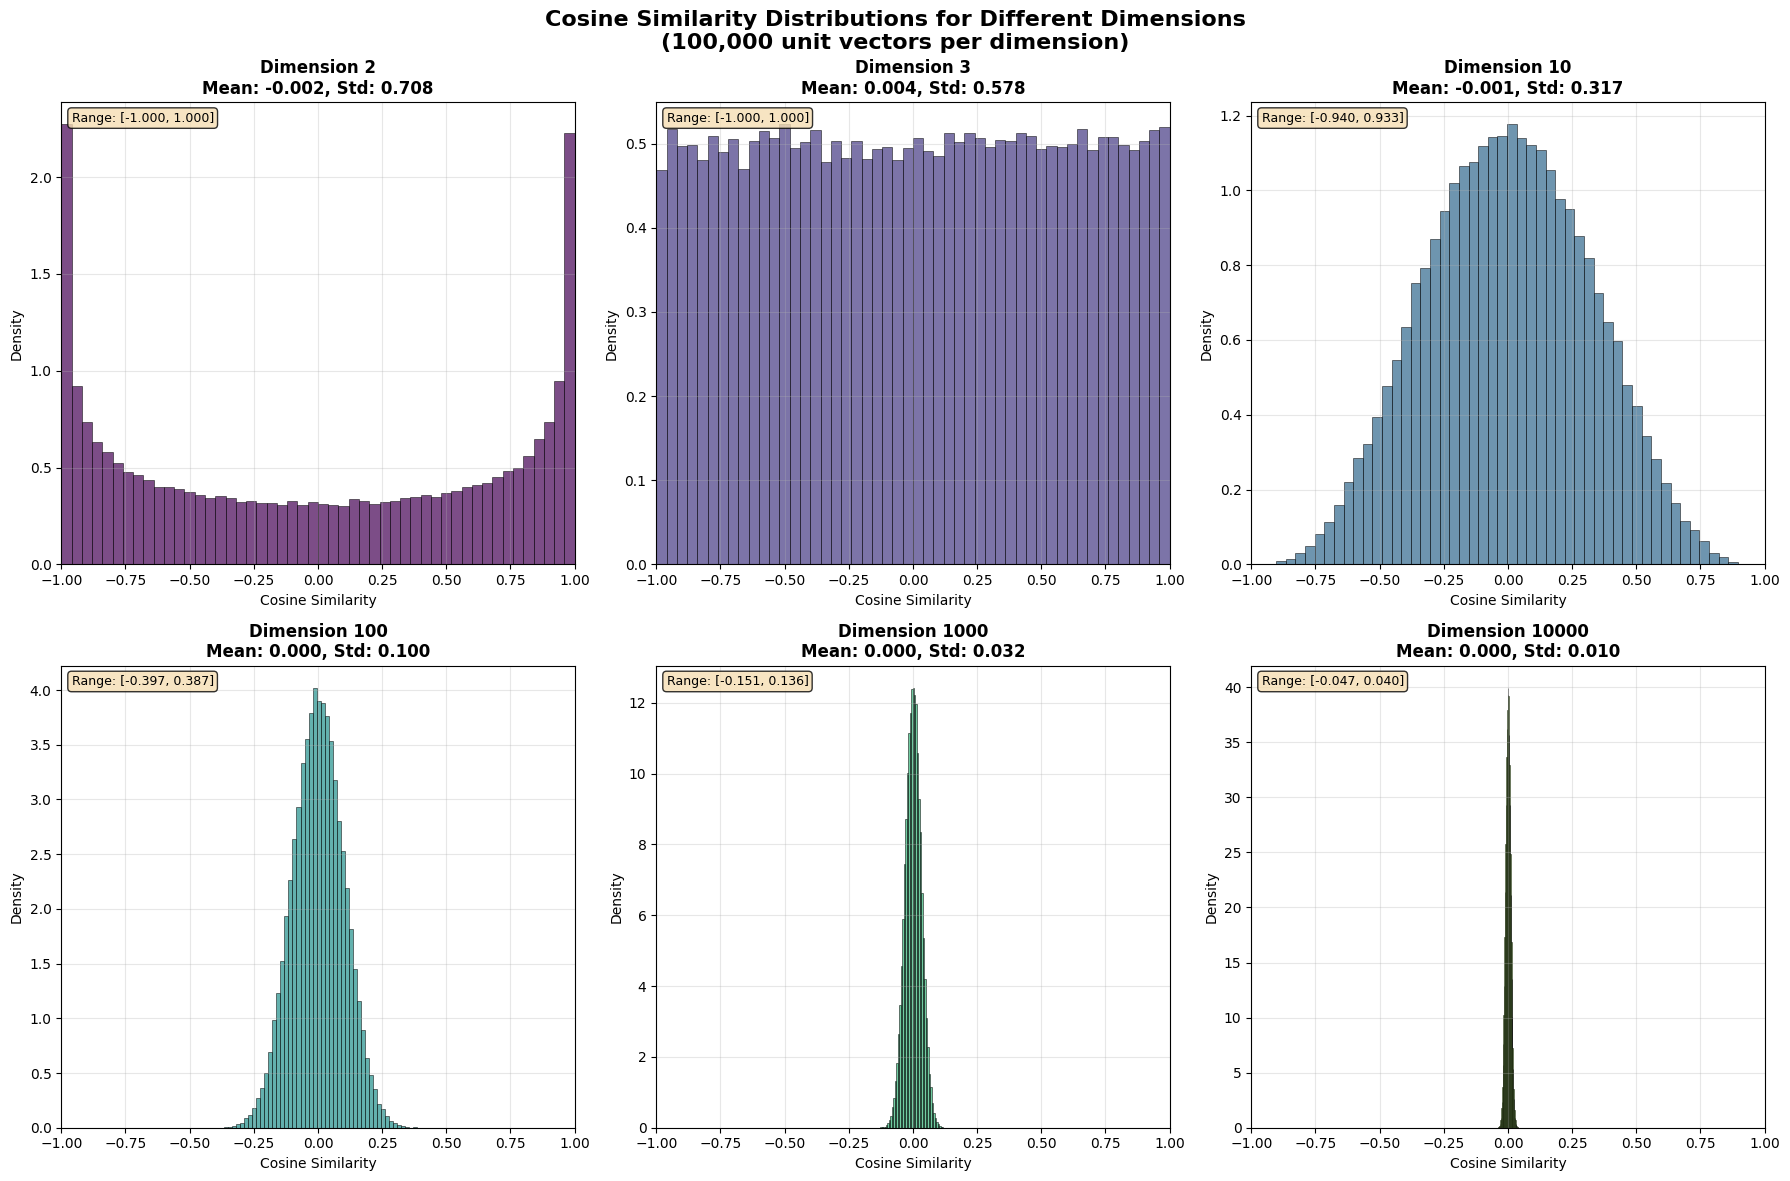

✅ Histograms created successfully!


In [7]:
# Create histograms for each dimension
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

print("Creating histograms...")

for i, dim in enumerate(dimensions):
    similarities = results[dim]['similarities']
    
    # Create histogram
    axes[i].hist(similarities, bins=50, alpha=0.7, density=True, 
                color=plt.cm.viridis(i/len(dimensions)), edgecolor='black', linewidth=0.5)
    
    # Customize plot
    axes[i].set_title(f'Dimension {dim}\nMean: {similarities.mean():.3f}, Std: {similarities.std():.3f}', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Cosine Similarity', fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(-1, 1)  # Unit scale x-axis
    
    # Add statistics text
    stats_text = f'Range: [{similarities.min():.3f}, {similarities.max():.3f}]'
    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', fontsize=9, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Cosine Similarity Distributions for Different Dimensions\n' + 
             f'({num_vectors:,} unit vectors per dimension)', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

print("✅ Histograms created successfully!")


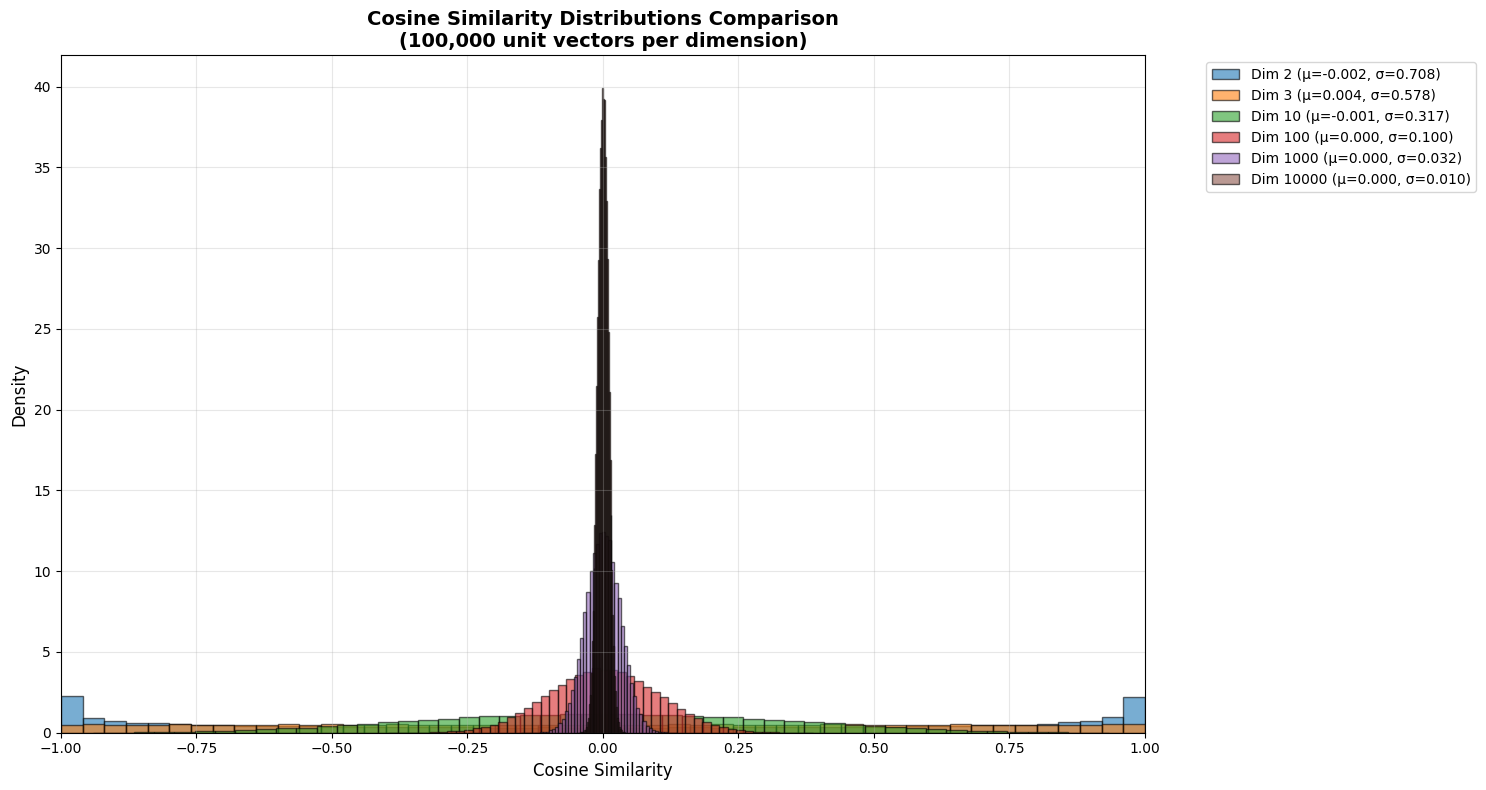

✅ Comparison plot created successfully!


In [9]:
# Create a combined comparison plot
plt.figure(figsize=(15, 8))

for dim in dimensions:
    similarities = results[dim]['similarities']
    plt.hist(similarities, bins=50, alpha=0.6, density=True, 
             label=f'Dim {dim} (μ={similarities.mean():.3f}, σ={similarities.std():.3f})',
             linewidth=1, edgecolor='black')

plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Cosine Similarity Distributions Comparison\n' + 
          f'({num_vectors:,} unit vectors per dimension)', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(-1, 1)  # Unit scale x-axis
plt.tight_layout()
plt.show()

print("✅ Comparison plot created successfully!")


In [10]:
# Statistical analysis and insights
print("📊 STATISTICAL ANALYSIS")
print("=" * 60)

# Create a summary table
summary_data = []
for dim in dimensions:
    similarities = results[dim]['similarities']
    summary_data.append({
        'Dimension': dim,
        'Mean': similarities.mean(),
        'Std': similarities.std(),
        'Min': similarities.min(),
        'Max': similarities.max(),
        'Median': np.median(similarities),
        'Q25': np.percentile(similarities, 25),
        'Q75': np.percentile(similarities, 75)
    })

# Display summary table
import pandas as pd
summary_df = pd.DataFrame(summary_data)
print("\nSummary Statistics:")
print(summary_df.round(4))

print("\n🔍 KEY INSIGHTS:")
print("-" * 30)

for dim in dimensions:
    similarities = results[dim]['similarities']
    std = similarities.std()
    print(f"Dimension {dim:>5}: Standard deviation = {std:.4f}")

print(f"\n📈 Observations:")
print("• As dimension increases, the standard deviation of cosine similarities decreases")
print("• In higher dimensions, unit vectors become more 'orthogonal' on average")
print("• This is a manifestation of the 'curse of dimensionality'")
print("• Cosine similarities tend to cluster around 0 in high dimensions")

# Theoretical expectation for high dimensions
print(f"\n🧮 Theoretical Expectation:")
print("For high-dimensional unit vectors, cosine similarity should approach:")
print("• Mean ≈ 0 (vectors are nearly orthogonal)")
print("• Standard deviation ≈ 1/√d (where d is dimension)")
print("• Distribution approaches normal distribution")


📊 STATISTICAL ANALYSIS

Summary Statistics:
   Dimension    Mean     Std     Min     Max  Median     Q25     Q75
0          2 -0.0021  0.7078 -1.0000  1.0000 -0.0047 -0.7106  0.7064
1          3  0.0038  0.5778 -1.0000  1.0000  0.0069 -0.4981  0.5041
2         10 -0.0008  0.3167 -0.9405  0.9334 -0.0008 -0.2292  0.2280
3        100  0.0003  0.1000 -0.3974  0.3870  0.0001 -0.0675  0.0682
4       1000  0.0000  0.0316 -0.1508  0.1362  0.0001 -0.0215  0.0214
5      10000  0.0000  0.0100 -0.0470  0.0402  0.0000 -0.0067  0.0068

🔍 KEY INSIGHTS:
------------------------------
Dimension     2: Standard deviation = 0.7078
Dimension     3: Standard deviation = 0.5778
Dimension    10: Standard deviation = 0.3167
Dimension   100: Standard deviation = 0.1000
Dimension  1000: Standard deviation = 0.0316
Dimension 10000: Standard deviation = 0.0100

📈 Observations:
• As dimension increases, the standard deviation of cosine similarities decreases
• In higher dimensions, unit vectors become more 'orthog

In [12]:
# Verify theoretical predictions
print("🧪 THEORETICAL VERIFICATION")
print("=" * 60)

theoretical_data = []
for dim in dimensions:
    similarities = results[dim]['similarities']
    actual_std = similarities.std()
    theoretical_std = 1 / np.sqrt(dim)
    
    theoretical_data.append({
        'Dimension': dim,
        'Actual_Std': actual_std,
        'Theoretical_Std': theoretical_std,
        'Ratio': actual_std / theoretical_std
    })

verification_df = pd.DataFrame(theoretical_data)
print("\nTheoretical vs Actual Standard Deviations:")
print(verification_df.round(4))

print(f"\n✅ Analysis Complete!")
print(f"📊 Generated {num_vectors:,} unit vectors for each of {len(dimensions)} dimensions")
print(f"📈 Created histograms showing cosine similarity distributions")
print(f"🔬 Verified theoretical predictions about high-dimensional geometry")
print(f"\n💡 Key finding: Standard deviation ≈ 1/√d as expected theoretically!")


🧪 THEORETICAL VERIFICATION

Theoretical vs Actual Standard Deviations:
   Dimension  Actual_Std  Theoretical_Std   Ratio
0          2      0.7078           0.7071  1.0010
1          3      0.5778           0.5774  1.0008
2         10      0.3167           0.3162  1.0015
3        100      0.1000           0.1000  1.0003
4       1000      0.0316           0.0316  0.9989
5      10000      0.0100           0.0100  0.9988

✅ Analysis Complete!
📊 Generated 100,000 unit vectors for each of 6 dimensions
📈 Created histograms showing cosine similarity distributions
🔬 Verified theoretical predictions about high-dimensional geometry

💡 Key finding: Standard deviation ≈ 1/√d as expected theoretically!
